In [1]:
# Importing all the necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the Dataset from Storage
STRIDE = pd.read_csv("STRIDE.csv")

In [3]:
# Displaying the Dimensionality of the Dataset
STRIDE.shape

(7000, 43)

In [4]:
# Checking the Categorical Unique Values of the Decisional Attribute
STRIDE['label'].unique()

array(['Information Disclosure', 'Repudiation', 'Normal', 'Spoofing',
       'Escalation of Privileges', 'DoS', 'Tampering'], dtype=object)

In [5]:
# Since there was an unnecessary Column in the Dataset, removing that column
STRIDE = STRIDE.drop(columns='Unnamed: 0')

In [6]:
# Displaying the Dimensionality of the Dataset
STRIDE.shape

(7000, 42)

In [7]:
# Changing the Decisional Labels to Numerical Equivalents
# 0 -> Spoofing      3 -> Info Disclosure
# 1 -> Tampering     4 -> DoS  
# 2 -> Repudiation   5 -> Escalation of Privileges   6 -> Normal

In [8]:
STRIDE['label'] = STRIDE['label'].map({'Spoofing': 0, 'Tampering': 1, 'Repudiation': 2, 
                                      'Information Disclosure':3, 'DoS':4, 'Escalation of Privileges':5, 'Normal':6})

In [9]:
# Checking the Numerical Unique Values of the Decisional Attribute
STRIDE['label'].unique()

array([3, 2, 6, 0, 5, 4, 1], dtype=int64)

In [10]:
# Splitting the Dataset based on its Conditional & Decisional Attributes
X = STRIDE.iloc[:,:-1]
y = STRIDE.iloc[:,-1]

In [11]:
# Performing Standard Scaling on the Input Dataset
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
print(X)

[[-0.13281325  0.31209268 -0.77010519 ... -0.12551435 -0.34682057
  -0.33486729]
 [-0.13281325  0.31209268  0.65016483 ... -0.12551435  3.04967565
   3.04037357]
 [-0.13281325  0.31209268  1.32648389 ... -0.12551435 -0.34682057
  -0.33486729]
 ...
 [-0.13281325  0.31209268  0.98832436 ... -0.12551435 -0.34682057
  -0.33486729]
 [-0.03262808  0.31209268  1.73227533 ... -0.12551435 -0.34682057
  -0.33486729]
 [-0.06195057  0.31209268  1.73227533 ... -0.12551435 -0.34682057
  -0.33486729]]


In [12]:
# Splitting the Dataset into Train, Test and Validation Datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [13]:
# Algorithm 1: Decision Tree Classifier

In [14]:
# Creating a DecisionTreeClassifier for identifying the Hyperparamters
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier(random_state=42)

In [15]:
# Now, we are going to perform the following 3 Cross-Validation Technqiues for all the Algorithms:
# 1. k-Fold Cross Validation
# 2. Stratified Cross Validation
# 3. ShuffleSplit Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dtc, X, y, cv=kf)
kfscore = scores.mean()
print("Mean accuracy:", kfscore)

Mean accuracy: 0.9778571428571429


In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dtc, X, y, cv=skf)
skfscore = scores.mean()
print("Mean accuracy:", skfscore)

Mean accuracy: 0.9775714285714285


In [18]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
scores = cross_val_score(dtc, X, y, cv=ss)
ssscore = scores.mean()
print("Mean accuracy:", ssscore)

Mean accuracy: 0.9752380952380953


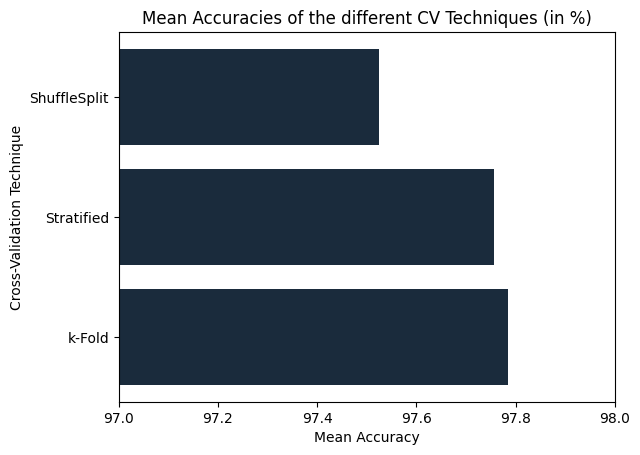

In [19]:
# Plotting a Bar Chart for the Mean Accuracies

Names = ['k-Fold', 'Stratified', 'ShuffleSplit']
Values = [kfscore*100, skfscore*100, ssscore*100]
plt.title(f"Mean Accuracies of the different CV Techniques (in %)")
plt.xlabel(f"Mean Accuracy")
plt.ylabel(f"Cross-Validation Technique")
plt.xlim(97,98)
plt.barh(Names, Values, color="#1a2b3c")
plt.show()

In [20]:
# From the above Bar Chart, we know that the best Cross Validation
# Technique is k-fold. We use that to identify the optimal HyperParameters.

In [21]:
# Defining the Hyperparameter Space for our Dataset with the Identified CVScore
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Printing the best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Number of Cross Val Score:",  grid_search.n_splits_)
print("Best Mean Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
Best Number of Cross Val Score: 5
Best Mean Cross-Validation Score: 0.972630704889978


In [22]:
# Creating a DecisionTreeClassifier with the Best Hyperparameters
best_params = grid_search.best_params_
dtc = DecisionTreeClassifier(**best_params, random_state=42)

In [23]:
# Training the Dataset
from sklearn.metrics import classification_report

dtc.fit(X_train, y_train)
y_vpred = dtc.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       213
           1       0.93      0.99      0.95       213
           2       0.96      0.96      0.96       213
           3       0.98      0.97      0.98       237
           4       1.00      0.97      0.98       201
           5       0.97      0.99      0.98       222
           6       0.98      0.96      0.97       249

    accuracy                           0.97      1548
   macro avg       0.97      0.97      0.97      1548
weighted avg       0.97      0.97      0.97      1548



In [24]:
y_tpred = dtc.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       335
           1       0.93      0.98      0.96       332
           2       0.96      0.97      0.97       351
           3       0.98      0.99      0.98       322
           4       1.00      0.94      0.97       335
           5       0.99      0.99      0.99       305
           6       0.98      0.95      0.96       330

    accuracy                           0.97      2310
   macro avg       0.97      0.97      0.97      2310
weighted avg       0.97      0.97      0.97      2310



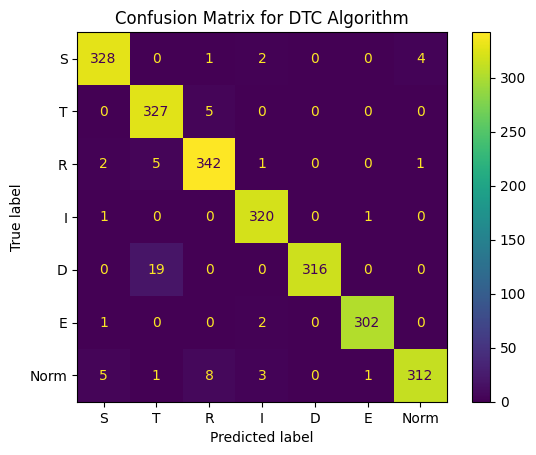

In [25]:
# Plotting the Confusion Matrix for the above Data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for DTC Algorithm')
plt.show()

In [26]:
# Algorithm 2: Gaussian Naive Bayes

In [27]:
# Create the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

In [28]:
# Training the Dataset
gnb.fit(X_train, y_train)
y_vpred = gnb.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       0.93      0.41      0.57       213
           1       0.96      0.99      0.97       213
           2       0.82      1.00      0.90       213
           3       0.77      0.97      0.86       237
           4       1.00      0.96      0.98       201
           5       0.93      0.77      0.84       222
           6       0.65      0.78      0.71       249

    accuracy                           0.84      1548
   macro avg       0.87      0.84      0.83      1548
weighted avg       0.86      0.84      0.83      1548



In [29]:
y_tpred = gnb.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.94      0.44      0.60       335
           1       0.94      0.98      0.96       332
           2       0.85      0.99      0.91       351
           3       0.72      1.00      0.83       322
           4       1.00      0.93      0.96       335
           5       0.95      0.68      0.79       305
           6       0.63      0.81      0.71       330

    accuracy                           0.83      2310
   macro avg       0.86      0.83      0.83      2310
weighted avg       0.86      0.83      0.83      2310



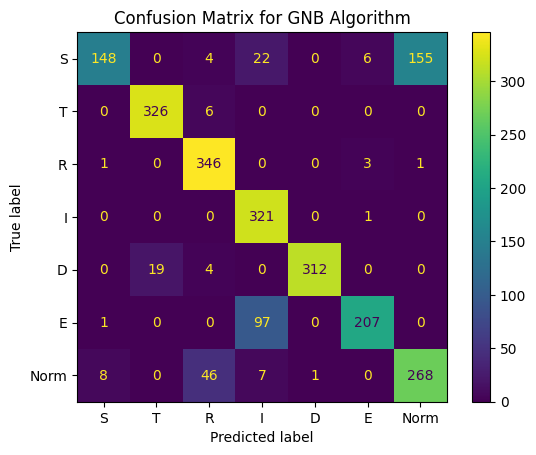

In [30]:
# Plotting the Confusion Matrix for the above Data
cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for GNB Algorithm')
plt.show()

In [31]:
# Algorithm 3: K-Nearest Neighbours

In [32]:
# Create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X, y, cv=kf)
kfscore = scores.mean()
print("Mean accuracy:", kfscore)

Mean accuracy: 0.971857142857143


In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X, y, cv=skf)
skfscore = scores.mean()
print("Mean accuracy:", skfscore)

Mean accuracy: 0.9721428571428572


In [35]:
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
scores = cross_val_score(knn, X, y, cv=ss)
ssscore = scores.mean()
print("Mean accuracy:", ssscore)

Mean accuracy: 0.9704761904761906


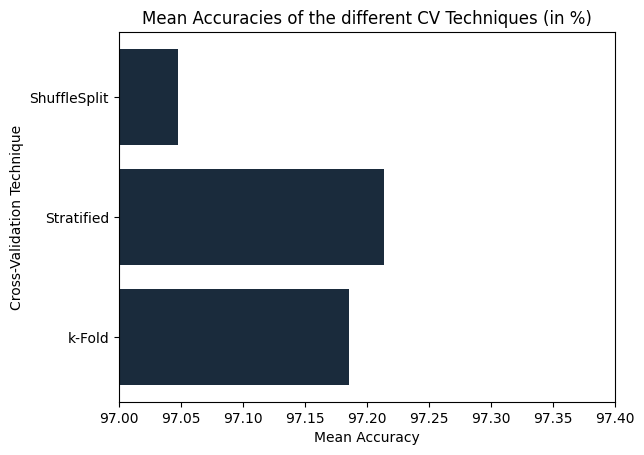

In [36]:
# Plotting a Bar Chart for the Mean Accuracies

Names = ['k-Fold', 'Stratified', 'ShuffleSplit']
Values = [kfscore*100, skfscore*100, ssscore*100]
plt.title(f"Mean Accuracies of the different CV Techniques (in %)")
plt.xlabel(f"Mean Accuracy")
plt.ylabel(f"Cross-Validation Technique")
plt.xlim(97.0,97.4)
plt.barh(Names, Values, color="#1a2b3c")
plt.show()

In [37]:
# From the above Bar Chart, we know that the best Cross Validation
# Technique is Stratified k-Fold. We use that to identify the optimal HyperParameters.

In [38]:
# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2] 
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=skf)
grid_search.fit(X_train, y_train)

# Printing the best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Number of Cross Val Score:",  grid_search.n_splits_)
print("Best Mean Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Best Number of Cross Val Score: 5
Best Mean Cross-Validation Score: 0.9751779692768828


In [39]:
# Creating a KNNClassifier with the Best Hyperparameters
best_params = grid_search.best_params_
knn = KNeighborsClassifier(**best_params)

In [40]:
# Training the Dataset
knn.fit(X_train, y_train)
y_vpred = knn.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       213
           1       0.95      0.99      0.97       213
           2       0.97      0.98      0.98       213
           3       0.96      0.96      0.96       237
           4       1.00      0.97      0.98       201
           5       0.94      0.96      0.95       222
           6       0.99      0.97      0.98       249

    accuracy                           0.97      1548
   macro avg       0.97      0.97      0.97      1548
weighted avg       0.97      0.97      0.97      1548



In [41]:
y_tpred = knn.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       335
           1       0.94      0.98      0.96       332
           2       0.98      0.99      0.98       351
           3       0.94      0.98      0.96       322
           4       1.00      0.94      0.97       335
           5       0.97      0.95      0.96       305
           6       1.00      0.95      0.97       330

    accuracy                           0.97      2310
   macro avg       0.97      0.97      0.97      2310
weighted avg       0.97      0.97      0.97      2310



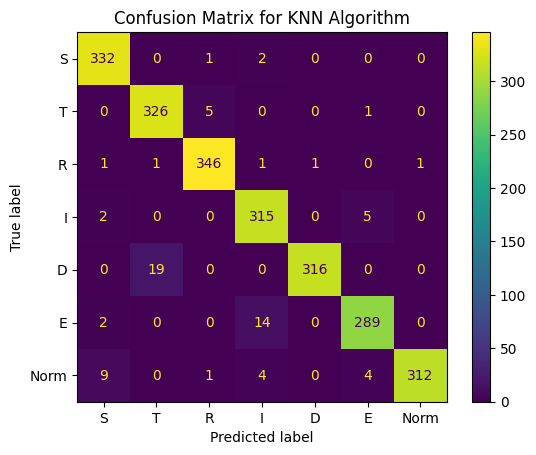

In [42]:
# Plotting the Confusion Matrix for the above Data
cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for KNN Algorithm')
plt.show()

In [43]:
# Algorithm 4: Logistic Regression

In [44]:
# Creating a LogisticRegressor for identifying the Hyperparamters
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [45]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X, y, cv=kf)
kfscore = scores.mean()
print("Mean accuracy:", kfscore)

Mean accuracy: 0.9482857142857142


In [46]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X, y, cv=skf)
skfscore = scores.mean()
print("Mean accuracy:", skfscore)

Mean accuracy: 0.9461428571428572


In [47]:
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
scores = cross_val_score(logreg, X, y, cv=ss)
ssscore = scores.mean()
print("Mean accuracy:", ssscore)

Mean accuracy: 0.9445887445887446


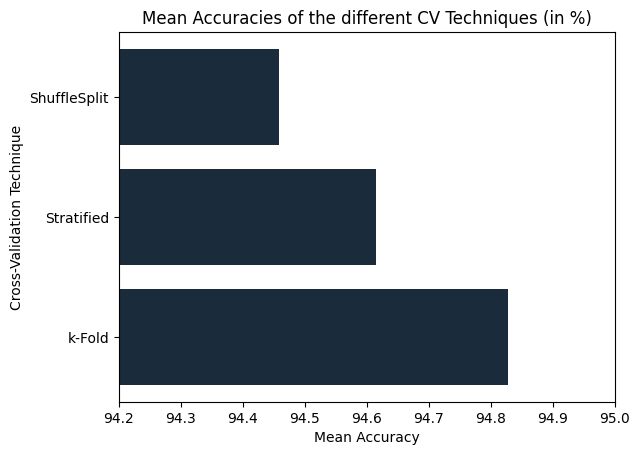

In [48]:
# Plotting a Bar Chart for the Mean Accuracies

Names = ['k-Fold', 'Stratified', 'ShuffleSplit']
Values = [kfscore*100, skfscore*100, ssscore*100]
plt.title(f"Mean Accuracies of the different CV Techniques (in %)")
plt.xlabel(f"Mean Accuracy")
plt.ylabel(f"Cross-Validation Technique")
plt.xlim(94.2,95.0)
plt.barh(Names, Values, color="#1a2b3c")
plt.show()

In [49]:
# From the above Bar Chart, we know that the best Cross Validation
# Technique is kFold. We use that to identify the optimal HyperParameters.

In [50]:
# Defining the Hyperparameter Space for our Dataset with the Identified CVScore
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Printing the best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Number of Cross Val Score:",  grid_search.n_splits_)
print("Best Mean Cross-Validation Score:", grid_search.best_score_)

C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Number of Cross Val Score: 5
Best Mean Cross-Validation Score: 0.9605363887679361


In [51]:
# Creating a LogisticRegressor with the Best Hyperparameters
best_params = grid_search.best_params_
logreg = LogisticRegression(**best_params, random_state=42)

In [52]:
# Training the Dataset
logreg.fit(X_train, y_train)
y_vpred = logreg.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       213
           1       0.97      0.98      0.97       213
           2       0.97      0.97      0.97       213
           3       0.97      0.96      0.97       237
           4       0.98      0.97      0.97       201
           5       0.95      0.98      0.97       222
           6       0.97      0.93      0.95       249

    accuracy                           0.97      1548
   macro avg       0.97      0.97      0.97      1548
weighted avg       0.97      0.97      0.97      1548



In [53]:
y_tpred = logreg.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       335
           1       0.94      0.98      0.96       332
           2       0.96      0.94      0.95       351
           3       0.97      0.96      0.97       322
           4       1.00      0.94      0.97       335
           5       0.95      0.97      0.96       305
           6       0.96      0.94      0.95       330

    accuracy                           0.96      2310
   macro avg       0.96      0.96      0.96      2310
weighted avg       0.96      0.96      0.96      2310



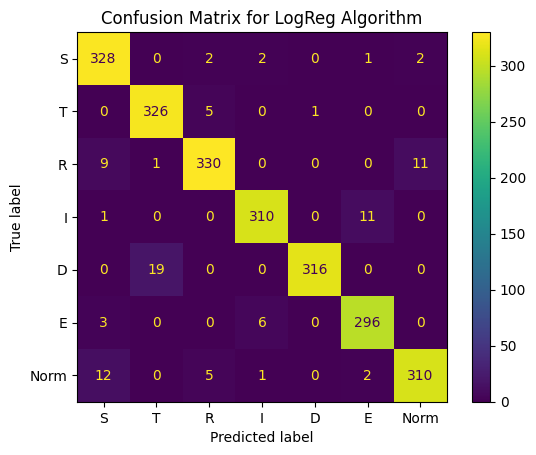

In [54]:
# Plotting the Confusion Matrix for the above Data
cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for LogReg Algorithm')
plt.show()

In [55]:
# Algorithm 5: Multilayer Perceptron Algorithm

In [56]:
# Creating a MultiLayer Perceptron Model for identifying the Hyperparamters
from sklearn.neural_network import MLPClassifier

# Define the MLP classifier
mlp = MLPClassifier(random_state=42)

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(mlp, X, y, cv=kf)
kfscore = scores.mean()
print("Mean accuracy:", kfscore)

C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Mean accuracy: 0.975


C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(mlp, X, y, cv=skf)
skfscore = scores.mean()
print("Mean accuracy:", skfscore)

C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Mean accuracy: 0.977


C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
scores = cross_val_score(mlp, X, y, cv=ss)
ssscore = scores.mean()
print("Mean accuracy:", ssscore)

C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Mean accuracy: 0.9748917748917749


C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


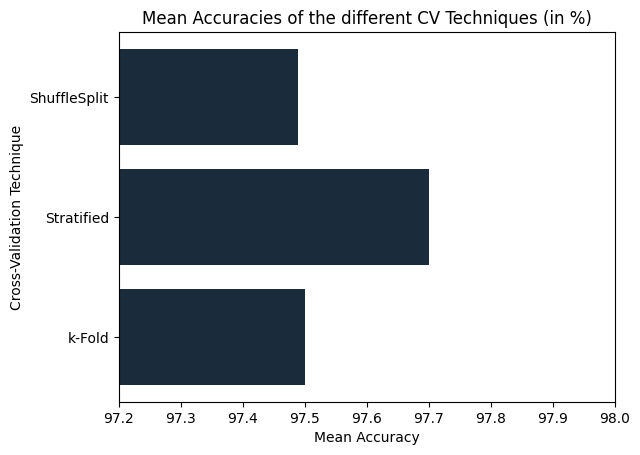

In [60]:
# Plotting a Bar Chart for the Mean Accuracies

Names = ['k-Fold', 'Stratified', 'ShuffleSplit']
Values = [kfscore*100, skfscore*100, ssscore*100]
plt.title(f"Mean Accuracies of the different CV Techniques (in %)")
plt.xlabel(f"Mean Accuracy")
plt.ylabel(f"Cross-Validation Technique")
plt.xlim(97.2,98)
plt.barh(Names, Values, color="#1a2b3c")
plt.show()

In [61]:
# From the above Bar Chart, we know that the best Cross Validation
# Technique is Stratified kFold. We use that to identify the optimal HyperParameters.

In [62]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['logistic', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [100, 200],
    'learning_rate': ['constant', 'adaptive']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Printing the best Hyperparameters
print("Best Hyperparameters:\n", grid_search.best_params_, sep="")
print("Best Number of Cross Val Score:",  grid_search.n_splits_)
print("Best Mean Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters:
{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'lbfgs'}
Best Number of Cross Val Score: 5
Best Mean Cross-Validation Score: 0.9716757971909715


C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [63]:
# Creating a MLPClassifier with the Best Hyperparameters
best_params = grid_search.best_params_
mlp = MLPClassifier(**best_params, random_state=42)

In [64]:
# Training the Dataset
mlp.fit(X_train, y_train)
y_vpred = mlp.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       213
           1       0.96      0.99      0.97       213
           2       0.99      0.98      0.98       213
           3       0.97      0.95      0.96       237
           4       0.98      0.97      0.97       201
           5       0.94      0.98      0.96       222
           6       0.99      0.94      0.96       249

    accuracy                           0.97      1548
   macro avg       0.97      0.97      0.97      1548
weighted avg       0.97      0.97      0.97      1548



C:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [65]:
y_tpred = mlp.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       335
           1       0.94      0.98      0.96       332
           2       0.98      0.98      0.98       351
           3       0.97      0.97      0.97       322
           4       1.00      0.94      0.97       335
           5       0.97      0.97      0.97       305
           6       0.99      0.94      0.97       330

    accuracy                           0.97      2310
   macro avg       0.97      0.97      0.97      2310
weighted avg       0.97      0.97      0.97      2310



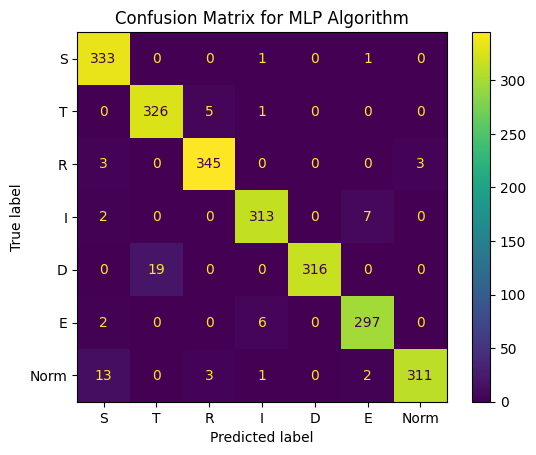

In [66]:
# Plotting the Confusion Matrix for the above Data
cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for MLP Algorithm')
plt.show()

In [67]:
# Algortihm 6: Random Forest Classifier 

In [68]:
# Creating a RandomForestClassifier for identifying the Hyperparamters
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=42)

In [69]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RFC, X, y, cv=kf)
kfscore = scores.mean()
print("Mean accuracy:", kfscore)

Mean accuracy: 0.984


In [70]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RFC, X, y, cv=skf)
skfscore = scores.mean()
print("Mean accuracy:", skfscore)

Mean accuracy: 0.984


In [71]:
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
scores = cross_val_score(RFC, X, y, cv=ss)
ssscore = scores.mean()
print("Mean accuracy:", ssscore)

Mean accuracy: 0.9827705627705627


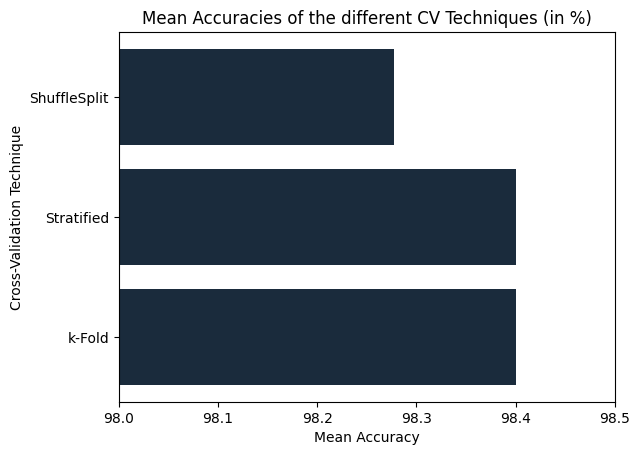

In [72]:
# Plotting a Bar Chart for the Mean Accuracies

Names = ['k-Fold', 'Stratified', 'ShuffleSplit']
Values = [kfscore*100, skfscore*100, ssscore*100]
plt.title(f"Mean Accuracies of the different CV Techniques (in %)")
plt.xlabel(f"Mean Accuracy")
plt.ylabel(f"Cross-Validation Technique")
plt.xlim(98,98.5)
plt.barh(Names, Values, color="#1a2b3c")
plt.show()

In [73]:
# From the above Bar Chart, we know that the best Cross Validation
# Technique is k-Fold. We use that to identify the optimal HyperParameters.

In [74]:
# Defining the Hyperparameter Space for our Dataset with the Identified CVScore
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

# Performing Grid Search to find the best Hyperparameters
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Printing the best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Number of Cross Val Score:",  grid_search.n_splits_)
print("Best Mean Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Number of Cross Val Score: 5
Best Mean Cross-Validation Score: 0.9789970937591768


In [75]:
# Creating a RandomForestClassifier with the Best Hyperparameters
best_params = grid_search.best_params_
RFC = RandomForestClassifier(**best_params, random_state=42)

In [76]:
RFC.fit(X_train, y_train)
y_vpred = RFC.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       213
           1       0.97      0.99      0.98       213
           2       0.98      1.00      0.99       213
           3       0.99      0.96      0.97       237
           4       1.00      0.97      0.98       201
           5       0.96      0.99      0.98       222
           6       0.99      0.99      0.99       249

    accuracy                           0.98      1548
   macro avg       0.98      0.98      0.98      1548
weighted avg       0.98      0.98      0.98      1548



In [77]:
y_tpred = RFC.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       335
           1       0.94      0.98      0.96       332
           2       0.98      1.00      0.99       351
           3       0.99      0.99      0.99       322
           4       1.00      0.94      0.97       335
           5       0.99      0.99      0.99       305
           6       1.00      0.98      0.99       330

    accuracy                           0.98      2310
   macro avg       0.98      0.98      0.98      2310
weighted avg       0.98      0.98      0.98      2310



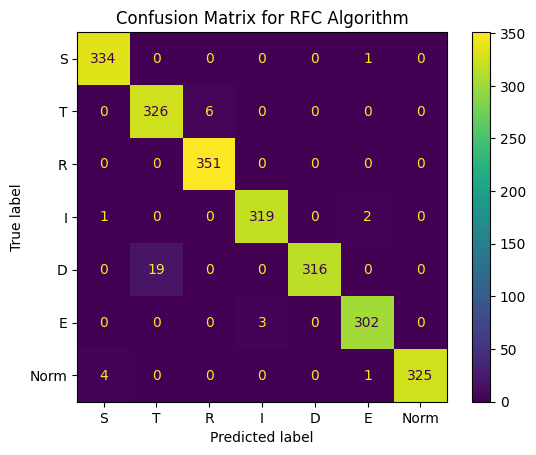

In [78]:
# Plotting the Confusion Matrix for the above Data
cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for RFC Algorithm')
plt.show()

In [79]:
# Algorithm 7: Support Vector Machine

In [80]:
# Create an SVM classifier
from sklearn.svm import SVC
svm = SVC(random_state=42)

In [81]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X, y, cv=kf)
kfscore = scores.mean()
print("Mean accuracy:", kfscore)

Mean accuracy: 0.9501428571428571


In [82]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X, y, cv=skf)
skfscore = scores.mean()
print("Mean accuracy:", skfscore)

Mean accuracy: 0.9495714285714285


In [83]:
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
scores = cross_val_score(svm, X, y, cv=ss)
ssscore = scores.mean()
print("Mean accuracy:", ssscore)

Mean accuracy: 0.9471861471861471


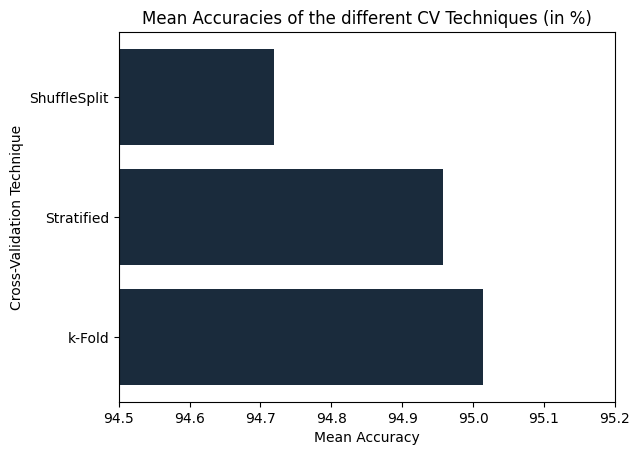

In [84]:
# Plotting a Bar Chart for the Mean Accuracies

Names = ['k-Fold', 'Stratified', 'ShuffleSplit']
Values = [kfscore*100, skfscore*100, ssscore*100]
plt.title(f"Mean Accuracies of the different CV Techniques (in %)")
plt.xlabel(f"Mean Accuracy")
plt.ylabel(f"Cross-Validation Technique")
plt.xlim(94.5,95.2)
plt.barh(Names, Values, color="#1a2b3c")
plt.show()

In [85]:
# From the above Bar Chart, we know that the best Cross Validation
# Technique is kFold. We use that to identify the optimal HyperParameters.

In [86]:
# Defining the Hyperparameter Space for our Dataset with the Identified CVScore
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],            
    'kernel': ['sigmoid', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Printing the best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Number of Cross Val Score:",  grid_search.n_splits_)
print("Best Mean Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Number of Cross Val Score: 5
Best Mean Cross-Validation Score: 0.9573567385294623


In [87]:
# Creating a SVM with the Best Hyperparameters
best_params = grid_search.best_params_
svm = SVC(**best_params, random_state=42)

In [88]:
svm.fit(X_train, y_train)
y_vpred = svm.predict(X_valid)
print("Classification Report between Train & Validation Sets:\n")
print(classification_report(y_valid, y_vpred))

Classification Report between Train & Validation Sets:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       213
           1       0.97      0.99      0.98       213
           2       0.98      0.99      0.98       213
           3       0.89      0.96      0.92       237
           4       1.00      0.97      0.98       201
           5       0.95      0.97      0.96       222
           6       1.00      0.96      0.98       249

    accuracy                           0.96      1548
   macro avg       0.96      0.96      0.96      1548
weighted avg       0.96      0.96      0.96      1548



In [89]:
y_tpred = svm.predict(X_test)
print("Classification Report between Train & Test Sets:\n")
print(classification_report(y_test, y_tpred))

Classification Report between Train & Test Sets:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       335
           1       0.94      0.98      0.96       332
           2       0.99      0.99      0.99       351
           3       0.88      0.97      0.92       322
           4       1.00      0.94      0.97       335
           5       0.95      0.96      0.95       305
           6       1.00      0.94      0.97       330

    accuracy                           0.96      2310
   macro avg       0.96      0.96      0.96      2310
weighted avg       0.96      0.96      0.96      2310



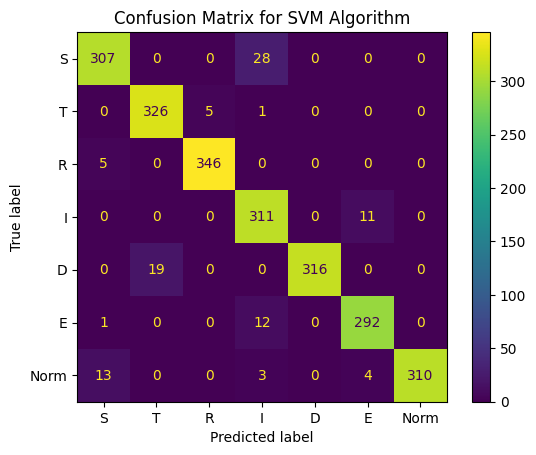

In [90]:
# Plotting the Confusion Matrix for the above Data
cnf_matrix = confusion_matrix(y_test, y_tpred)
labels = ['S', 'T', 'R', 'I', 'D', 'E', 'Norm']
ConfusionMatrixDisplay(cnf_matrix, display_labels = labels).plot()
plt.title('Confusion Matrix for SVM Algorithm')
plt.show()